In [1]:
#Download dữ liệu phân bón fresh + Dry Matter (bao gồm gia súc và gia cầm)
!gdown --id 1Eqy2Wvewq5sO3nBCM3PjiKfSD3ZHW_Gf

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Eqy2Wvewq5sO3nBCM3PjiKfSD3ZHW_Gf
To: /content/Fresh_Manure_with_Dry_Matter.xlsx
100% 2.18M/2.18M [00:00<00:00, 158MB/s]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as collections
import pandas as pd
from scipy import interpolate
from scipy.signal import savgol_filter

from sys import stdout

from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

# Load data
data = pd.read_excel("Fresh_Manure_with_Dry_Matter.xlsx")
wl = np.linspace(1100, 2498, 700)


In [ ]:

# def msc(input_data, reference=None):
#     ''' Perform Multiplicative scatter correction'''

#     # mean centre correction
#     for i in range(input_data.shape[0]):
#         input_data[i,:] -= input_data[i,:].mean()

#     # Get the reference spectrum. If not given, estimate it from the mean
#     if reference is None:
#         # Calculate mean
#         ref = np.mean(input_data, axis=0)
#     else:
#         ref = reference

#     # Define a new array and populate it with the corrected data
#     data_msc = np.zeros_like(input_data)
#     for i in range(input_data.shape[0]):
#         # Run regression
#         fit = np.polyfit(ref, input_data[i,:], 1, full=True)
#         # Apply correction
#         data_msc[i,:] = (input_data[i,:] - fit[0][1]) / fit[0][0]

#     return (data_msc, ref)

In [3]:
data

,sample_name,1100_nm,1102_nm,1104_nm,1106_nm,1108_nm,1110_nm,1112_nm,1114_nm,1116_nm,...,2482_nm,2484_nm,2486_nm,2488_nm,2490_nm,2492_nm,2494_nm,2496_nm,2498_nm,DM
0,FBCRIF001,0.588418,0.588407,0.588012,0.587727,0.587602,0.587279,0.586653,0.586186,0.586046,...,1.686953,1.689275,1.691759,1.694338,1.696744,1.698854,1.700564,1.701765,1.702570,20.815
1,FBCRIF002,0.530671,0.530607,0.530356,0.530160,0.530084,0.529749,0.529146,0.528818,0.528807,...,1.579084,1.581248,1.583488,1.585777,1.587941,1.589935,1.591674,1.593029,1.594062,25.480
2,FBCRIF003,0.532509,0.532652,0.532556,0.532679,0.532500,0.532282,0.531813,0.531593,0.531658,...,1.612479,1.614203,1.616133,1.618259,1.620364,1.622323,1.623984,1.625191,1.626028,17.595
3,FBCRIF004,0.495200,0.494887,0.494335,0.493886,0.493594,0.493283,0.492497,0.492086,0.492000,...,1.568502,1.570339,1.572338,1.574459,1.576464,1.578253,1.579747,1.580875,1.581749,19.110
4,FBCRIF005,0.476230,0.476494,0.476465,0.476356,0.476468,0.476366,0.476144,0.476265,0.476501,...,1.603243,1.604913,1.606800,1.608894,1.610958,1.612836,1.614357,1.615386,1.616054,18.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,R_FERM_48_FBV_LT,0.921903,0.921882,0.921879,0.921892,0.921893,0.921852,0.921772,0.921675,0.921602,...,1.525306,1.528573,1.531451,1.534228,1.537057,1.539675,1.541941,1.544031,1.546002,37.350
328,R_FERM_49_FBV_LT,1.226104,1.226319,1.226631,1.226985,1.227300,1.227568,1.227816,1.228038,1.228266,...,1.560118,1.562692,1.565166,1.567635,1.570050,1.572208,1.574032,1.575824,1.577748,34.340
329,R_FERM_50_FBV_LT,1.208262,1.208337,1.208493,1.208694,1.208869,1.208999,1.209085,1.209125,1.209165,...,1.786263,1.790263,1.793536,1.796581,1.799726,1.802921,1.805966,1.809047,1.812130,25.690
330,R_FERM_69_FBV,0.571057,0.570358,0.569508,0.568678,0.567928,0.567190,0.566426,0.565650,0.564924,...,1.550831,1.553917,1.556775,1.559369,1.561662,1.563666,1.565651,1.567573,1.569299,30.660


In [4]:
data.values[:,1:-1]

array([[0.5884178, 0.5884069, 0.588012, ..., 1.7005643, 1.7017648,
        1.7025703],
       [0.5306713, 0.5306072, 0.5303559, ..., 1.5916744, 1.593029,
        1.5940621],
       [0.5325094, 0.5326517, 0.5325564, ..., 1.6239842, 1.6251912,
        1.6260278],
       ...,
       [1.2082624, 1.2083368, 1.2084932, ..., 1.8059663, 1.8090471,
        1.8121296],
       [0.5710573, 0.5703582, 0.5695085, ..., 1.5656513, 1.5675735,
        1.5692993],
       [0.8847895, 0.8841888, 0.8834763, ..., 1.549235, 1.5515095,
        1.5535606]], dtype=object)

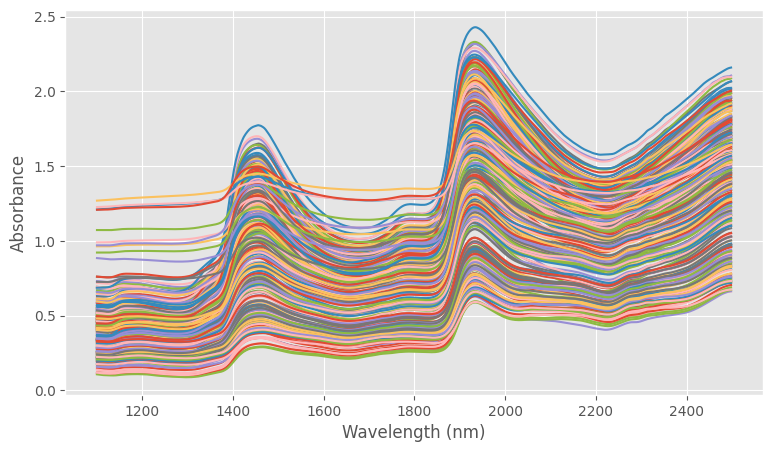

In [5]:
# Extract the arrays
X = data.values[:,1:-1]
y = data["DM"]

# Multiplicative Scatter Correction
# Xc, ref = msc(X)

# First Derivative Smoothing
# Xc = savgol_filter(X,11,3, deriv=1)

# Plot Data
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.plot(wl, X.T)
    ax.set_xlabel("Wavelength (nm)")
    ax.set_ylabel("Absorbance")
plt.show()

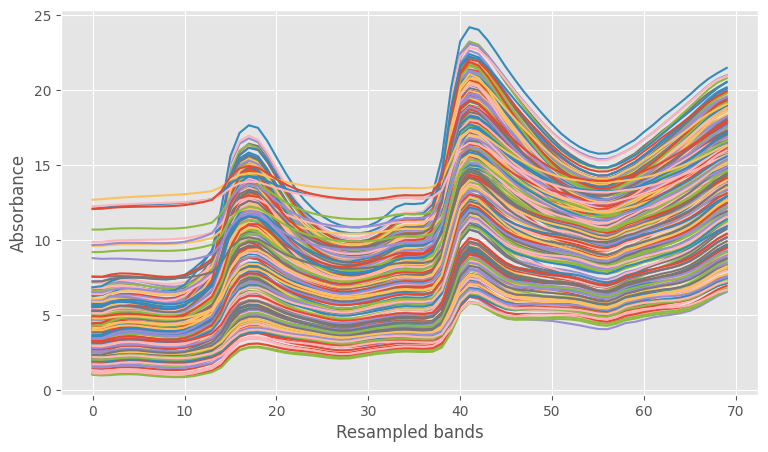

In [6]:
XX = X.reshape(X.shape[0],70,10).sum(axis=2)

with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.plot(XX.T)
    ax.set_xlabel("Resampled bands")
    ax.set_ylabel("Absorbance")
plt.show()

In [7]:
def regression_plot(y_ref, y_pred, title = None, variable = None):

    # Regression plot
    z = np.polyfit(y_ref, y_pred, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_ref, y_pred, c='red', edgecolors='k')
        ax.plot(y_ref, z[1]+z[0]*y_ref, c='blue', linewidth=1)
        ax.plot(y_ref, y_ref, color='green', linewidth=1)

        if title is not None:
            plt.title(title)
        if variable is not None:
            plt.xlabel('Measured ' + variable)
            plt.ylabel('Predicted ' + variable)

        plt.show()

In [8]:
def base_pls(X,y,n_components, return_model=False):

    # Simple PLS
    pls_simple = PLSRegression(n_components=n_components)
    # Fit
    pls_simple.fit(X, y)
    # Cross-validation
    y_cv = cross_val_predict(pls_simple, X, y, cv=10)

    # Calculate scores
    score = r2_score(y, y_cv)
    rmsecv = np.sqrt(mean_squared_error(y, y_cv))

    if return_model == False:
        return(y_cv, score, rmsecv)
    else:
        return(y_cv, score, rmsecv, pls_simple)

In [9]:
def pls_optimise_components(X, y, npc):

    rmsecv = np.zeros(npc)
    for i in range(1,npc+1,1):

        # Simple PLS
        pls_simple = PLSRegression(n_components=i)
        # Fit
        pls_simple.fit(X, y)
        # Cross-validation
        y_cv = cross_val_predict(pls_simple, X, y, cv=10)

        # Calculate scores
        score = r2_score(y, y_cv)
        rmsecv[i-1] = np.sqrt(mean_squared_error(y, y_cv))

    # Find the minimum of ther RMSE and its location
    opt_comp, rmsecv_min = np.argmin(rmsecv),  rmsecv[np.argmin(rmsecv)]

    return (opt_comp+1, rmsecv_min)

PLS results:
   R2: 0.983, RMSE: 2.613
   Number of Latent Variables: 18


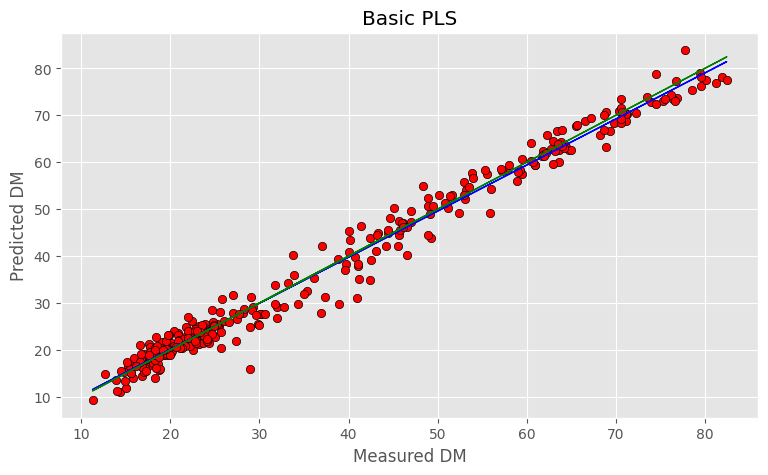

In [ ]:
opt_comp, rmsecv_min = pls_optimise_components(X, y, 20)
predicted, r2cv, rmscv = base_pls(X, y, opt_comp)
print("   PLS results:")
print("   R2: %5.3f, RMSE: %5.3f"%(r2cv, rmscv))
print("   Number of Latent Variables: "+str(opt_comp))

regression_plot(y, predicted, title="Basic PLS", variable = "DM")

PLS + Stimulated Annealing

In [10]:
def band_selection_sa(X,y,n_of_bands, max_lv, n_iter):

    p = np.arange(X.shape[1]) # =700
    np.random.shuffle(p)
    bands = p[:n_of_bands] # Selected Bands. Start off with a random selection
    nbands = p[n_of_bands:] # Excluded bands

    Xop = X[:,bands] #This is the array to be optimised

    # Run a PLS optimising the number of latent variables
    opt_comp, rmsecv_min = pls_optimise_components(Xop, y, max_lv)

    rms = [] # Here we store the RMSE value as the optimisation progresses
    for i in range(n_iter):

        cool = 0.001*rmsecv_min # cooling parameter. It decreases with the RMSE
        new_bands = np.copy(bands)
        new_nbands = np.copy(nbands)

        # swap three elements at random
        for jj in range(3):
            r1, r2 = np.random.randint(n_of_bands),np.random.randint(X.shape[1]-n_of_bands)
            el1, el2 = new_bands[r1],new_nbands[r2]
            new_bands[r1] = el2
            new_nbands[r2] = el1

        Xop = X[:,new_bands]

        opt_comp_new, rmsecv_min_new = pls_optimise_components(Xop, y, max_lv)

        # If the new RMSE is less than the previous, accept the change
        if (rmsecv_min_new < rmsecv_min):
            bands = new_bands
            nbands = new_nbands
            opt_comp = opt_comp_new
            rmsecv_min = rmsecv_min_new
            rms.append(rmsecv_min_new)

            stdout.write("\r"+str(i))
            stdout.write(" ")
            stdout.write(str(opt_comp_new))
            stdout.write(" ")
            stdout.write(str(rmsecv_min_new))
            stdout.flush()

        # If the new RMSE is larger than the previous, accept it with some probability # dictated by the cooling parameter
        if (rmsecv_min_new > rmsecv_min):

            prob = np.exp(-(rmsecv_min_new - rmsecv_min)/cool) # probability
            if (np.random.random() < prob):
                bands = new_bands
                nbands = new_nbands
                opt_comp = opt_comp_new
                rmsecv_min = rmsecv_min_new
                rms.append(rmsecv_min_new)

                stdout.write("\r"+str(i))
                stdout.write(" ")
                stdout.write(str(opt_comp_new))
                stdout.write(" ")
                stdout.write(str(rmsecv_min_new))
                stdout.flush()
            else:
                rms.append(rmsecv_min)

    stdout.write("\n")
    print(np.sort(bands))
    print('end')

    return(bands, opt_comp,rms)

In [12]:
np.random.randint(20)

16

703 16 2.4071300398257214
[16 17 21 26 29 31 32 34 36 37 38 46 49 50 53 58 63 66 68 69]
end
PLS optimised bands:
   R2: 0.986, RMSE: 2.407
   Number of Latent Variables: 16


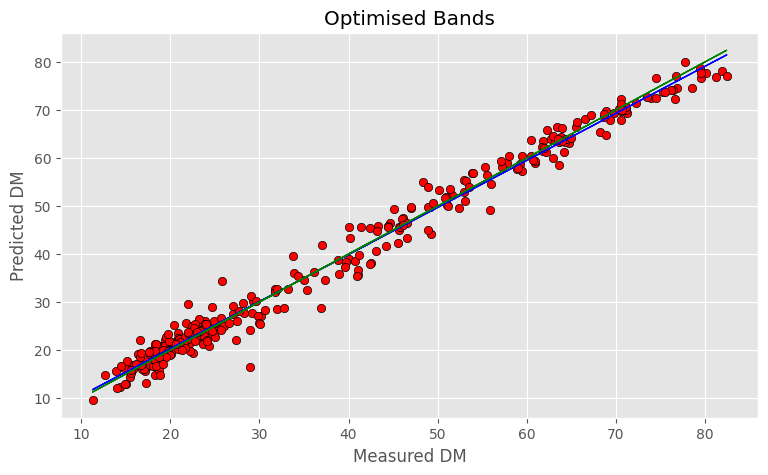

In [30]:
bands, opt_comp, rms = band_selection_sa(XX,y,n_of_bands = 20, max_lv = 20, n_iter = 1000)
predicted, r2cv, rmscv = base_pls(XX[:,bands], y, opt_comp)

print("PLS optimised bands:")
print("   R2: %5.3f, RMSE: %5.3f"%(r2cv, rmscv))
print("   Number of Latent Variables: "+str(opt_comp))

regression_plot(y, predicted, title="Optimised Bands", variable = "DM")

In [22]:
bands

array([40, 15, 16, 26,  8, 50, 68, 69, 12, 65, 44, 49, 33, 41, 56, 55, 48,
        7, 30, 18])

<ipython-input-29-55ca3818b30b>:12: MatplotlibDeprecationWarning: The span_where function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use fill_between instead.
  collection = collections.BrokenBarHCollection.span_where(
<ipython-input-29-55ca3818b30b>:12: MatplotlibDeprecationWarning: The BrokenBarHCollection class was deprecated in Matplotlib 3.7 and will be removed two minor releases later.
  collection = collections.BrokenBarHCollection.span_where(


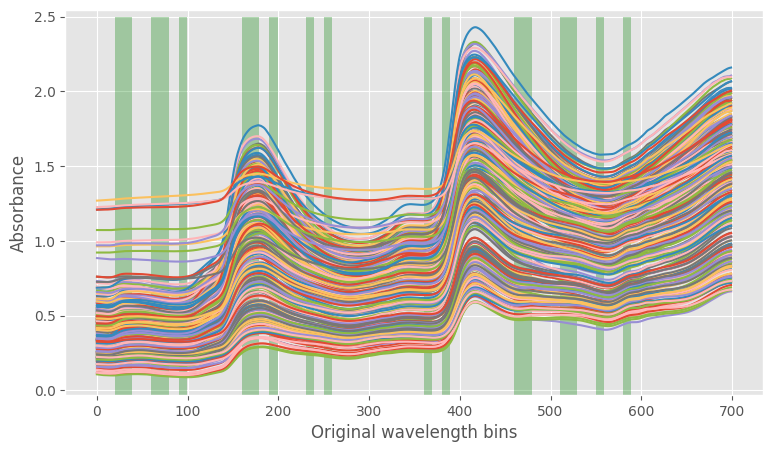

In [29]:
# ix is the index of the selected bands
ix = np.in1d(np.arange(60).ravel(), np.sort(bands))
# To overlap the bands on the original spectrum, we restore the original band size
ixx = np.repeat(ix,10)

# Plot spectra with superimposed selected bands
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9,5))
    ax.plot(np.arange(X.shape[1]),X.T)
    plt.ylabel('Absorbance')
    plt.xlabel('Original wavelength bins')
    collection = collections.BrokenBarHCollection.span_where(
        np.arange(X.shape[1]), ymin=-1, ymax=2.5, where=(ixx == True), facecolor='green', alpha=0.3)
    ax.add_collection(collection)
plt.show()